In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [3]:
data = pd.read_csv("spambase_csv.csv")

In [5]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
x = 1
for col in data.columns:
    print(f'columns {x} is:', col)
    x += 1

columns 1 is: word_freq_make
columns 2 is: word_freq_address
columns 3 is: word_freq_all
columns 4 is: word_freq_3d
columns 5 is: word_freq_our
columns 6 is: word_freq_over
columns 7 is: word_freq_remove
columns 8 is: word_freq_internet
columns 9 is: word_freq_order
columns 10 is: word_freq_mail
columns 11 is: word_freq_receive
columns 12 is: word_freq_will
columns 13 is: word_freq_people
columns 14 is: word_freq_report
columns 15 is: word_freq_addresses
columns 16 is: word_freq_free
columns 17 is: word_freq_business
columns 18 is: word_freq_email
columns 19 is: word_freq_you
columns 20 is: word_freq_credit
columns 21 is: word_freq_your
columns 22 is: word_freq_font
columns 23 is: word_freq_000
columns 24 is: word_freq_money
columns 25 is: word_freq_hp
columns 26 is: word_freq_hpl
columns 27 is: word_freq_george
columns 28 is: word_freq_650
columns 29 is: word_freq_lab
columns 30 is: word_freq_labs
columns 31 is: word_freq_telnet
columns 32 is: word_freq_857
columns 33 is: word_freq_da

In [9]:
data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


<Axes: >

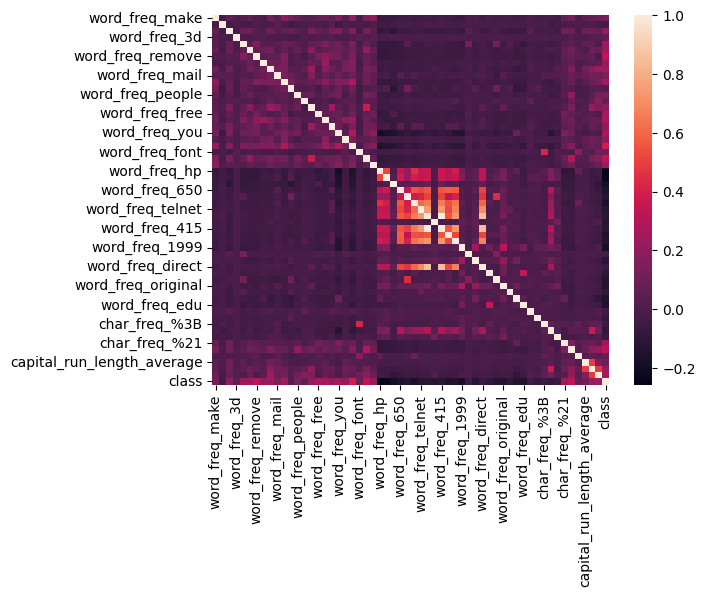

In [13]:
sns.heatmap(data.corr())

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [17]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [19]:
data.duplicated().sum()

391

In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [23]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [25]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64

In [28]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
print('X \n', X[:10])
print('Y \n', y[:10])

X 
 [[0.00000000e+00 4.48179272e-02 1.25490196e-01 0.00000000e+00
  3.20000000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.61840745e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.60000000e-02
  0.00000000e+00 1.41914191e-01 1.02933333e-01 0.00000000e+00
  8.64086409e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.39546770e-02
  0.00000000e+00 0.00000000e+00 2.50204267e-03 6.00720865e-03
  1.74873737e-02]
 [4.62555066e-02 1.96078431e-02 9.80392157e-02 0.00000000e+00
  1.40000000e-02 4.76190476e-02 2.88858322e-02 6

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle=True)
print('X_train shape is', X_train.shape)
print('X_test shape is', X_test.shape)
print('Y_train shape is', y_train.shape)
print('Y_test shape is', y_test.shape)

X_train shape is (3220, 57)
X_test shape is (1381, 57)
Y_train shape is (3220,)
Y_test shape is (1381,)


In [34]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(random_state=33, solver='sag')

In [36]:
print('LogisticRegressionModel Train Score is:', LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is: 0.8841614906832298
LogisticRegressionModel Test Score is :  0.8899348298334541
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [22]


In [38]:
MLPClassifierModel = MLPClassifier(activation='relu',
                                   solver='lbfgs',
                                   learning_rate='constant',
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 10),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

/home/huppdev28/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(100, 10), random_state=33, solver='lbfgs')

In [40]:
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)

MLPClassifierModel Train Score is :  0.9599378881987578
MLPClassifierModel Test Score is :  0.945691527878349
MLPClassifierModel loss is :  0.11564519424982929
MLPClassifierModel No. of iterations is :  200
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  logistic


In [42]:
RandomForestClassifierModel = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=20, random_state=33)
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=33)

In [44]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

RandomForestClassifierModel Train Score is :  0.9953416149068323
RandomForestClassifierModel Test Score is :  0.9580014482259233
RandomForestClassifierModel features importances are :  [0.00365887 0.00485768 0.00856814 0.00076864 0.03944764 0.00708168
 0.08253872 0.01330616 0.00359643 0.00809186 0.00804413 0.01080494
 0.00324715 0.00181715 0.00111308 0.06883513 0.01600187 0.00901154
 0.02895308 0.00486181 0.05417168 0.00264764 0.02710413 0.03439114
 0.04795883 0.01652855 0.02104829 0.00440651 0.00232715 0.00455872
 0.00190642 0.00073323 0.00211985 0.00066649 0.00389011 0.00371141
 0.01626977 0.00054874 0.00349943 0.00104704 0.00091069 0.00689365
 0.00214485 0.00220065 0.00899623 0.01898088 0.0001549  0.00082392
 0.00539867 0.01159838 0.00301478 0.11333765 0.08925632 0.00390639
 0.0628374  0.05682515 0.03857862]


In [46]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=33)
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=33)

In [48]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.9928571428571429
DecisionTreeClassifierModel Test Score is :  0.9145546705286025
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.00376066 0.00131379 0.00431366 0.         0.0192461  0.00359768
 0.15523263 0.00646208 0.00080755 0.00241621 0.00415103 0.00384477
 0.0022844  0.00177054 0.         0.02621814 0.00325556 0.00978778
 0.01376979 0.00192517 0.01499398 0.         0.01903238 0.00524041
 0.053221   0.00398234 0.01843215 0.00489287 0.00214852 0.00324069
 0.00062625 0.         0.00066419 0.00126653 0.00121912 0.00550814
 0.00044424 0.00067052 0.00963789 0.         0.         0.01516472
 0.00188963 0.00133876 0.00891268 0.01252669 0.         0.
 0.00303849 0.01067458 0.         0.09863243 0.34044789 0.00650676
 0.02738777 0.02495181 0.03914902]


In [53]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors=15,weights ='distance',
                                          algorithm='auto')
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [56]:
print('KNNClassifierModel Train Score is: ', KNNClassifierModel.score(X_train, y_train))
print('KNNCLassifierModel Test Score is: ', KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is:  0.9993788819875776
KNNCLassifierModel Test Score is:  0.9102099927588704


<BarContainer object of 57 artists>

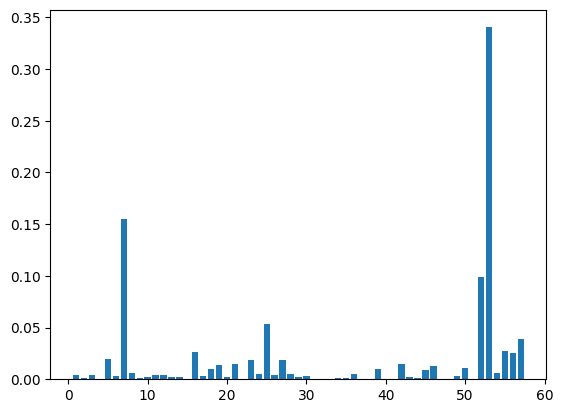

In [61]:
x_bar=list(range(1,58))
plt.bar(x_bar,DecisionTreeClassifierModel.feature_importances_)


In [63]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted value for RandomForestClassifierModel is: ', y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is: ', y_pred_prob[:10])

Predicted value for RandomForestClassifierModel is:  [0 1 0 0 1 0 0 0 1 0]
Prediction Probabilities Value for RandomForestClassifierModel is:  [[0.93142893 0.06857107]
 [0.23       0.77      ]
 [0.66616112 0.33383888]
 [0.97603358 0.02396642]
 [0.         1.        ]
 [0.95857718 0.04142282]
 [0.557999   0.442001  ]
 [0.82269568 0.17730432]
 [0.12216716 0.87783284]
 [0.94       0.06      ]]


Confusion Matrix is: 
 [[807  20]
 [ 38 516]]


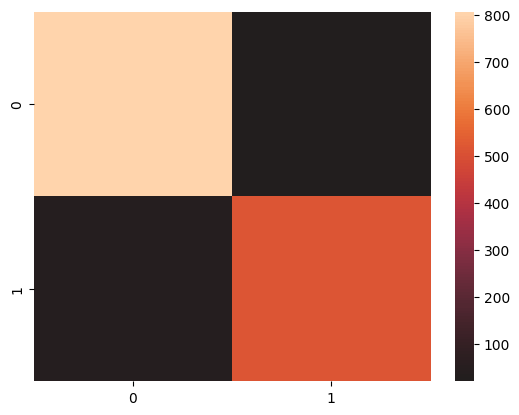

In [65]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is: \n', CM)
sns.heatmap(CM, center=True)
plt.show()

Confusion Matrix is: 
 [[1960    1]
 [  14 1245]]


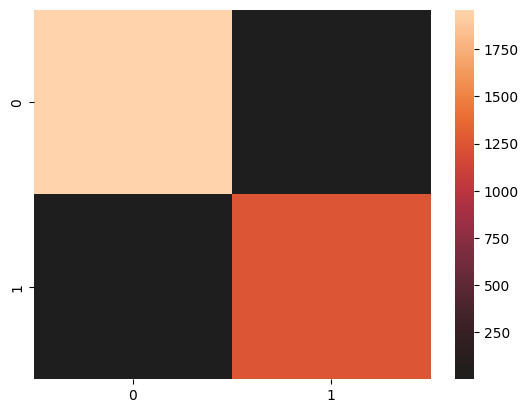

In [67]:
CM = confusion_matrix(y_train, RandomForestClassifierModel.predict(X_train))
print('Confusion Matrix is: \n', CM)
sns.heatmap(CM, center=True)
plt.show()

In [69]:
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is: ', AccScore)

Accuracy Score is:  0.9580014482259233


In [71]:
F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is: ', F1Score)

F1 Score is:  0.9580014482259233


In [73]:
ReCallScore = recall_score(y_test, y_pred, average='micro')
print('Recall Score is: ', ReCallScore)

Recall Score is:  0.9580014482259233


In [75]:
PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Prediction Score is: ', PrecisionScore)

Prediction Score is:  0.9580014482259233


In [77]:
PrecisionValue, RecallValue, ThresholdValue = precision_recall_curve(y_test, y_pred)
print('Precision Value is: ', PrecisionValue)
print('RecallValue is: ', RecallValue)
print('ThresholdValue is: ', ThresholdValue)

Precision Value is:  [0.40115858 0.96268657 1.        ]
RecallValue is:  [1.         0.93140794 0.        ]
ThresholdValue is:  [0 1]


In [79]:
ClassificationReport = classification_report(y_test, y_pred)
print('Classification Report is: ', ClassificationReport)

Classification Report is:                precision    recall  f1-score   support

           0       0.96      0.98      0.97       827
           1       0.96      0.93      0.95       554

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.96      1381
weighted avg       0.96      0.96      0.96      1381



In [81]:
ROCAUCScore = roc_auc_score(y_test, y_pred, average='micro')
print('ROCAUC Score: ', ROCAUCScore)

ROCAUC Score:  0.9536120726910803


In [83]:
submission = pd.DataFrame(y_pred, columns = ['prediction'])
submission.to_csv('prediction.csv')
submission

,prediction
0,0
1,1
2,0
3,0
4,1
...,...
1376,0
1377,1
1378,1
1379,1
